In [11]:
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt 
import numpy as np 

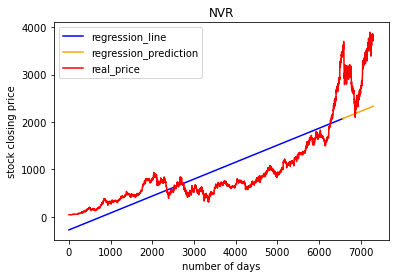

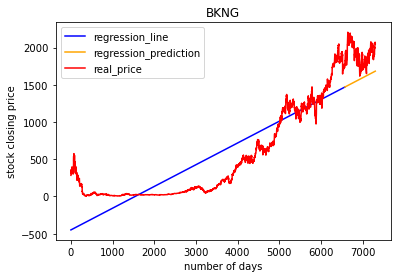

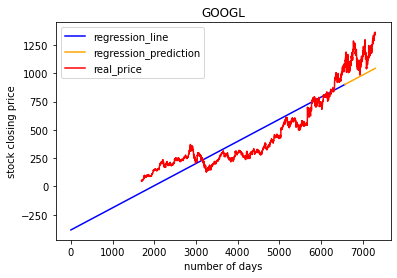

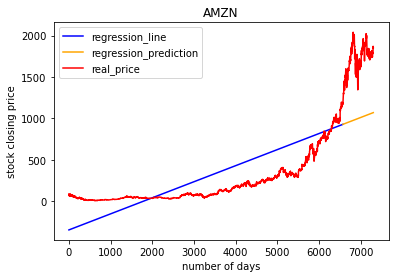

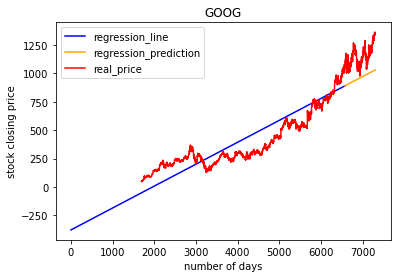

In [30]:
def read_csv(path_of_csv):
    return pd.read_csv(path_of_csv)

def get_the_top_n_companies(model_df, top_k):
    return model_df.nlargest(top_k, 'm').index

def plot_the_reg_line(index_of_selected_comp, comps_stock_df, comps_model_df, percent):
    fig, ax = plt.subplots()
    slope = comps_model_df.loc[index_of_selected_comp]['m']
    intercept = comps_model_df.loc[index_of_selected_comp]['c']
    axes = plt.gca()
    x_vals = comps_stock_df['Date']
    y_vals = intercept + slope * x_vals
    previous_dates = int(len(comps_stock_df)*(percent/100))
    ax.plot(x_vals[:previous_dates], y_vals[:previous_dates], color='blue', label = "regression_line")
    ax.plot(x_vals[previous_dates:], y_vals[previous_dates:], color='orange', label = "regression_prediction")
    ax.plot(comps_stock_df['Date'], comps_stock_df[index_of_selected_comp], label = "real_price", color='red')
    ax.set_title(index_of_selected_comp)
    plt.xlabel("number of days")
    plt.ylabel("stock closing price")
    plt.legend(loc='best')
    plt.show()
    

comps_model_df = pd.read_csv("models.csv", names=['model_names', 'm', 'c'], index_col='model_names', skiprows=1)
comps_stock_df = pd.read_csv("All_SP500_Companies_Close_Price_From_20000101_to_20200101.csv")
top_k_comps = get_the_top_n_companies(model_file, 5)
for comp in top_k_comps:
    plot_the_reg_line(comp, comps_stock_df, comps_model_df, 90)